# Advent of Code 2022
## [Day 14: Regolith Reservoir](https://adventofcode.com/2022/day/14)

#### Load Data

In [1]:
import aocd
input_data = aocd.get_data(year=2022, day=14).split("\n")
input_data[:5]

['511,54 -> 511,56 -> 504,56 -> 504,61 -> 520,61 -> 520,56 -> 515,56 -> 515,54',
 '516,113 -> 521,113',
 '511,101 -> 511,103 -> 504,103 -> 504,106 -> 517,106 -> 517,103 -> 513,103 -> 513,101',
 '529,82 -> 533,82',
 '541,157 -> 545,157']

In [2]:
test_data = """498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9""".split("\n")

### Part 1

In [3]:
import numpy as np
from collections import namedtuple

In [4]:
Point = namedtuple('Point', ['x', 'y'])

In [5]:
[np.array([*map(int, p.split(','))]) for p in test_data[0].split(" -> ")]

[array([498,   4]), array([498,   6]), array([496,   6])]

In [6]:
p1 = np.array([500, 54])
p2 = np.array([500, 50])
np.sign(p2 - p1)

array([ 0, -1])

In [7]:
np.array_equal

<function numpy.array_equal(a1, a2, equal_nan=False)>

In [8]:
def init_grid(data):
    grid = np.zeros(shape=(1000, 200), dtype='<U1')
    grid[()] = '.'
    grid
    def draw_line(p1, p2):
        step = np.sign(p2 - p1)
        cursor = p1
        while not np.array_equal(cursor, p2):
            grid[tuple(cursor)] = '#'
            cursor += step
        grid[tuple(cursor)] = '#'
        
    for line in data:
        points = [np.array([*map(int, p.split(','))]) for p in line.split(" -> ")]
        for i in range(1, len(points)):
            draw_line(points[i-1], points[i])
        
    return grid

g = init_grid(test_data)
g[495:504,0:10].T

array([['.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '#', '.', '.', '.', '#', '#'],
       ['.', '.', '.', '#', '.', '.', '.', '#', '.'],
       ['.', '#', '#', '#', '.', '.', '.', '#', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '#', '.'],
       ['#', '#', '#', '#', '#', '#', '#', '#', '.']], dtype='<U1')

In [9]:
directions = [
    np.array([0,1]),
    np.array([-1,1]),
    np.array([1,1])
]

def add_sand(grid):
    cursor = np.array([500,0])
    at_rest = False
    while not at_rest:
        at_rest = True
        for d in directions:
            next_cursor = cursor + d
            if grid[tuple(next_cursor)] == '.':
                cursor = next_cursor
                at_rest = False
                break
        if at_rest:
            next_cursor = cursor
    if grid[tuple(cursor)] == '.':
        grid[tuple(cursor)] = '.'
        cursor = next_cursor
        grid[tuple(cursor)] = 'o'
    return cursor
    
add_sand(g)
g[495:504,0:10].T

array([['.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '#', '.', '.', '.', '#', '#'],
       ['.', '.', '.', '#', '.', '.', '.', '#', '.'],
       ['.', '#', '#', '#', '.', '.', '.', '#', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '.', '.', '.', 'o', '.', '#', '.'],
       ['#', '#', '#', '#', '#', '#', '#', '#', '.']], dtype='<U1')

In [10]:
def count_sand(data):
    grid = init_grid(data)
    n = 0
    try:
        while True:
            add_sand(grid)
            n += 1
    except IndexError:
        pass
    return n, grid
    
count_sand(test_data)

(24,
 array([['.', '.', '.', ..., '.', '.', '.'],
        ['.', '.', '.', ..., '.', '.', '.'],
        ['.', '.', '.', ..., '.', '.', '.'],
        ...,
        ['.', '.', '.', ..., '.', '.', '.'],
        ['.', '.', '.', ..., '.', '.', '.'],
        ['.', '.', '.', ..., '.', '.', '.']], dtype='<U1'))

#### Part 1 Answer
Using your scan, simulate the falling sand.  
**How many units of sand come to rest before sand starts flowing into the abyss below?**

In [11]:
n, g = count_sand(input_data)
n

737

In [12]:
from pathlib import Path
import sys
if str(Path('../..').resolve()) not in sys.path:
    sys.path.insert(0, str(Path('../..').resolve()))

from aoc_lib import array_to_png

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
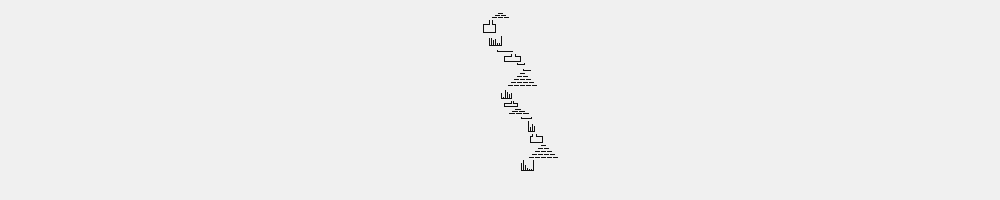

In [13]:
g.T == '#'

---

### Part 2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
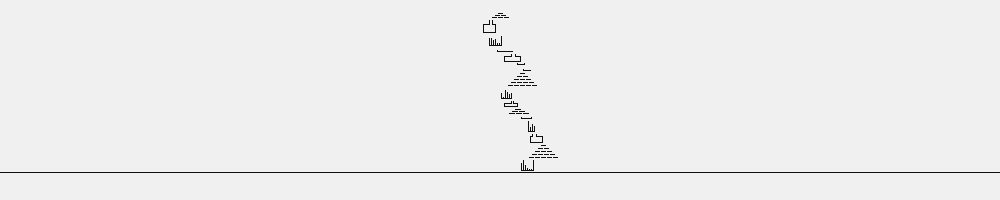

In [14]:
def add_floor(grid):
    floor = np.where(grid == '#')[1].max() + 2
    grid[:, floor] = '#'
    
add_floor(g)
g.T == '#'

In [15]:
def count_sand_floor(data):
    grid = init_grid(data)
    add_floor(grid)
    n = 0
    try:
        while True:
            cursor = add_sand(grid)
            n += 1
            if np.array_equal(cursor, [500,0]):
                break
    except IndexError:
        pass
    return n, grid
    
n, g = count_sand_floor(test_data)
n

93

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
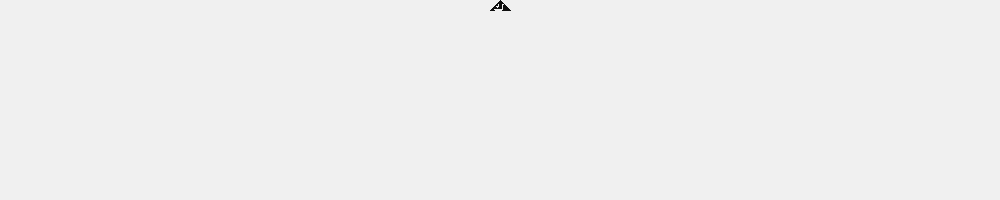

In [16]:
g.T == "o"

#### Part 2 Answer
Using your scan, simulate the falling sand until the source of the sand becomes blocked.  
**How many units of sand come to rest?**

In [17]:
n, g = count_sand_floor(input_data)
n

28145

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
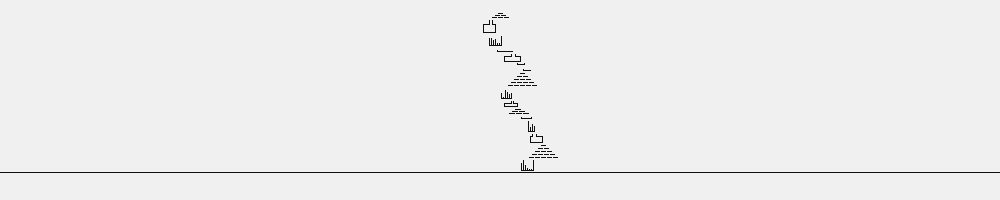

In [18]:
g.T == "#"

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
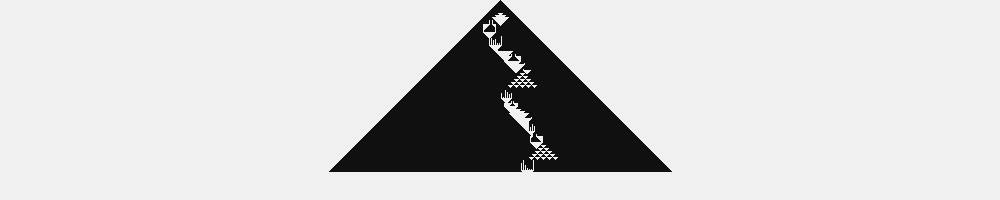

In [19]:
g.T == "o"